# Sistemas de Aprendizaje Automático - Examen parcial
2024/03/14

## Iris dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
import dtreeviz

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1956)

In [3]:
knn_iris = KNeighborsClassifier(np.sqrt(X_train.shape[0]).astype(int)).fit(X_train, y_train)
y_pred_knn = knn_iris.predict(X_test)

score = np.sum(y_pred_knn==y_test)/len(y_test)

>1. ¿Qué parámetro se está pasando al constructor del clasificador? ¿qué función cumple?

...

>2. ¿Qué información nos da la variable `score`?



In [4]:
log_reg_multi = LogisticRegression().fit(X_train, y_train)
y_pred = log_reg_multi.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

>3. ¿Qué información nos da la variable `mae`? ¿Qué otra métrica sería la apropiada en este caso?



In [5]:
tree_clf = DecisionTreeClassifier().fit(X_train, y_train)

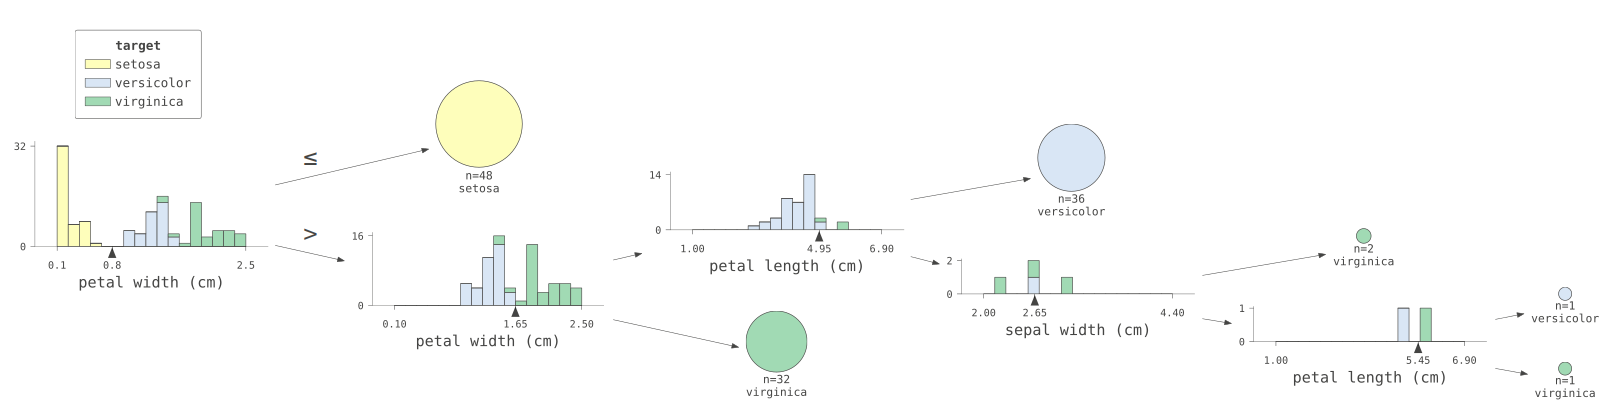

In [6]:

viz_model = dtreeviz.model(tree_clf, X_train, y_train,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))
viz_model.view(fontname="monospace", scale=1.7, orientation="LR")

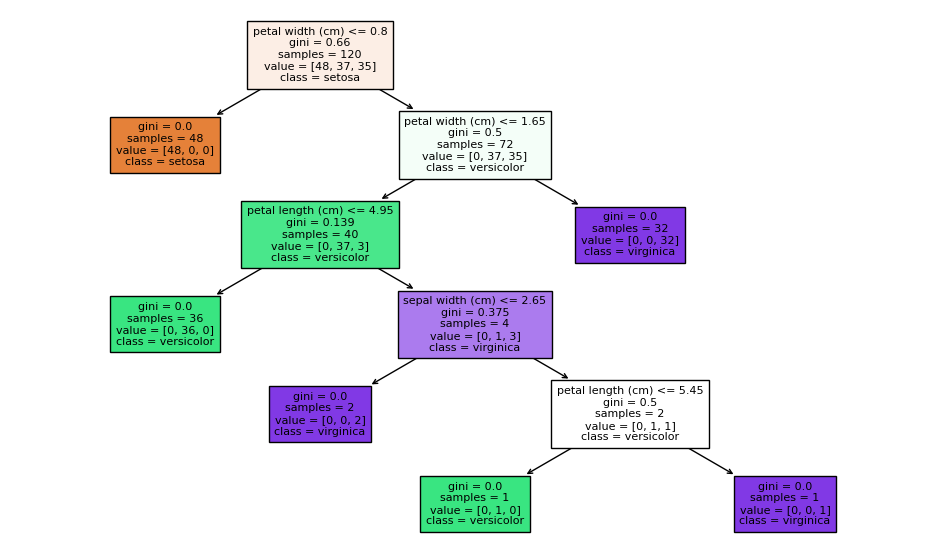

In [7]:
plt.figure(figsize=(12, 7))

plot_tree(tree_clf, feature_names=iris.feature_names, class_names=list(iris.target_names), filled=True, fontsize=8)
plt.show()

>4. En el arbol de decisión anterior, ¿es posible que se esté dando overfitting? ¿por qué? ¿cómo se podría solucionar?



## Experiencia vs salario

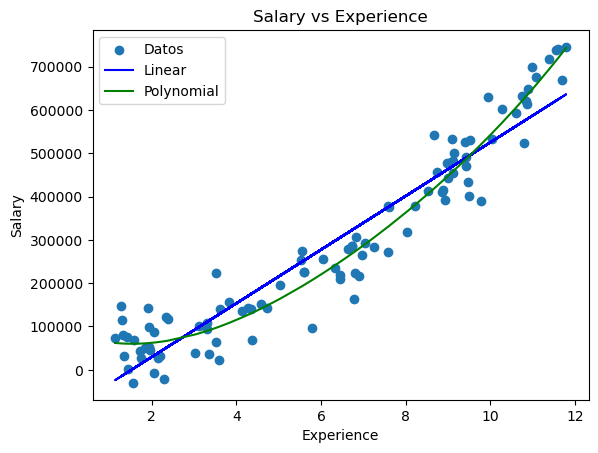

Root Mean Squared Error (Linear): 68217.32804732288
Root Mean Squared Error (Polynomial): 49273.90709808602


In [8]:
df = pd.read_csv("data/salaries3.csv")

X = df[['YearsExperience']].values
y = df['Salary'].values

plt.scatter(X, y, label='Datos')

# Linear Regression
linear_regressor = LinearRegression().fit(X, y)
y_pred_linear = linear_regressor.predict(X)

plt.plot(X, y_pred_linear, color='blue', label='Linear')

# Polynomial Regression
poly_features = PolynomialFeatures(degree=4)
x_poly = poly_features.fit_transform(X)
poly_regressor = LinearRegression().fit(x_poly, y)
y_pred_poly = poly_regressor.predict(x_poly)

X_sorted, y_pred_poly_sorted = zip(*sorted(zip(X, y_pred_poly)))

plt.plot(X_sorted, y_pred_poly_sorted, color='green', label='Polynomial')
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

print(f"Root Mean Squared Error (Linear): {np.sqrt(mean_squared_error(y, y_pred_linear))}")
print(f"Root Mean Squared Error (Polynomial): {np.sqrt(mean_squared_error(y, y_pred_poly))}")

>5. El anterior código realiza una regresión lineal simple y otra polinómica sobre los mismos datos.
¿Cuál de los dos modelos tiene mejor rendimiento? ¿Cómo podríamos tener una mejor medida de rendimiento de cada uno? ¿Por qué?


